In [29]:
from astropy.io import fits
import numpy as np
import lime
import matplotlib.pyplot as plt


In [ ]:
cube = lime.Cube.from_file('manga-8626-12704-LOGCUBE.fits', instrument='manga')

In [37]:
wavelength_array = cube.wave_rest.data
flux_cube_array = cube.flux.data


In [ ]:
wavelength_ranges = {
    'h_alpha': (6540, 6580),
    'h_beta': (4040, 4080), 
    'h_gamma': (4340, 4380),
    'h_delta': (4860, 4900),
    'h_epsilon': (5000, 5040),
    'h_zeta': (5870, 5910),
    'h_eta': (6640, 6680),
    'zero_three': (4850, 5020),
    's_two': (6700, 6750)
}

wavelength_sums = {}


for name, wavelength in wavelength_ranges.items():
    start, end  = wavelength
    
    idx1, idx2 = np.searchsorted(wavelength_array, [start, end])

    wavelength_sum = np.log10(flux_cube_array[idx1:idx2, :, :].sum(axis=0))
    # wavelength_sum = (flux_cube_array[idx1:idx2, :, :].sum(axis=0))
    wavelength_sums[name] = wavelength_sum



In [ ]:
name = 'h_gamma'


plt.figure(figsize=(8, 7)) # Optional: adjust the figure size
img_plot = plt.imshow(wavelength_sums[name], cmap='viridis', origin='lower', interpolation='nearest')
plt.colorbar(img_plot, label='Summed Flux (arbitrary units)') # Add a label describing the colorbar

# Add a title and axis labels
plt.title(f'Summed Flux (Wavelength Index {wavelength_ranges[name][0]} to {wavelength_ranges[name][1]})')
plt.xlabel('X Pixel Coordinate')
plt.ylabel('Y Pixel Coordinate')

# Show the plot
plt.show()

In [81]:
total_intensities = [sum(img) for img in wavelength_sums.values()]
range_names = list(wavelength_sums.keys())


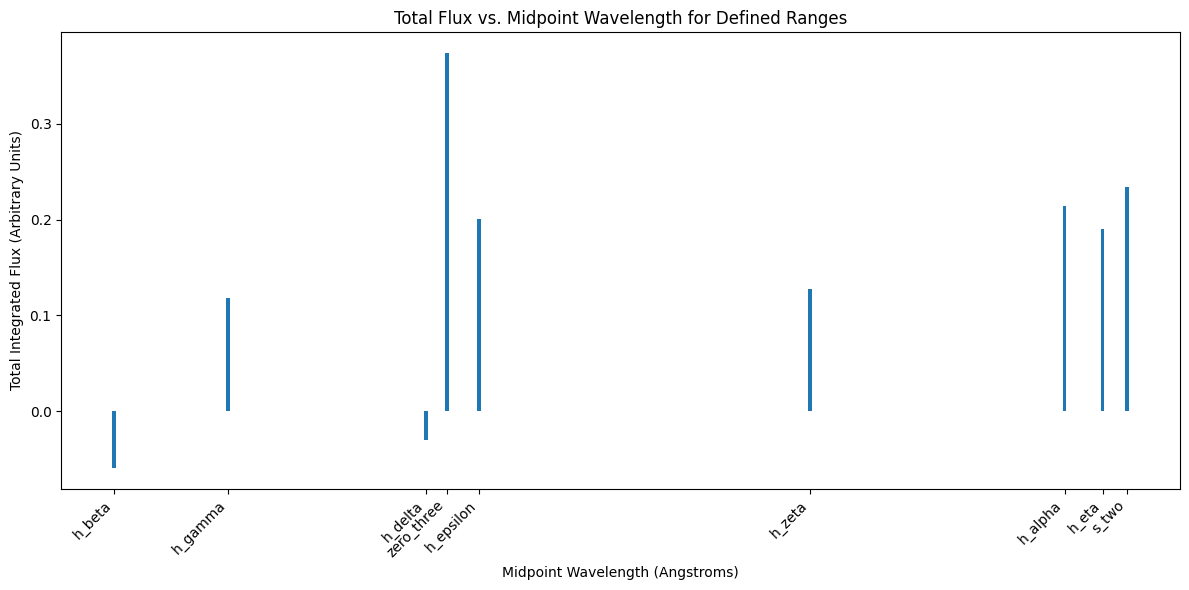

In [98]:
# Calculate total linear flux and midpoint wavelength for each range
total_linear_fluxes = {}
midpoint_wavelengths = {}

for name, wavelength_range in wavelength_ranges.items():
    start, end = wavelength_range
    idx1, idx2 = np.searchsorted(wavelength_array, [start, end])

    # Sum the *linear* flux across spatial dimensions for this range
    linear_flux_sum = np.sum(flux_cube_array[idx1:idx2, 10, 30])
    total_linear_fluxes[name] = linear_flux_sum

    # Calculate the midpoint wavelength
    midpoint_wavelengths[name] = (start + end) / 2

# Prepare data for plotting
names = list(total_linear_fluxes.keys())
flux_values = [total_linear_fluxes[name] for name in names]
wavelength_values = [midpoint_wavelengths[name] for name in names]

# Sort by wavelength for a cleaner plot
sorted_indices = np.argsort(wavelength_values)
sorted_names = [names[i] for i in sorted_indices]
sorted_flux = [flux_values[i] for i in sorted_indices]
sorted_wavelengths = [wavelength_values[i] for i in sorted_indices]

# Create the plot (e.g., a bar chart)
plt.figure(figsize=(12, 6))
plt.bar(sorted_wavelengths, sorted_flux, width=10) # Adjust width as needed

# Add labels and title
plt.xlabel("Midpoint Wavelength (Angstroms)")
plt.ylabel("Total Integrated Flux (Arbitrary Units)") # Update if units are known
plt.title("Total Flux vs. Midpoint Wavelength for Defined Ranges")
plt.xticks(sorted_wavelengths, sorted_names, rotation=45, ha='right') # Label bars with range names
plt.tight_layout()
plt.show()